# Assignment 2

#### Patrick Pfenning

**Task 1: Operations**
---

**Categorical Qualitative:**

**1. Attribute Type: Nominal**

- **Operations**: mode, entropy, contingency correlation, chi-squared test

    * **Mode**:
        * **Explanation**: The mode is the value that appears most frequently in a data set.
        * **Why Suitable**: Nominal attributes are non-numeric and non-ordered, so operations like mean or median are not applicable. The mode, however, identifies the most common category in the dataset.
        * **Why Not for Others**: For other attribute types that have an inherent order or are numeric, using only the mode may miss out on other statistical insights.
        * **Real-world Application**: Determining the most common eye color in a sample of people.

    * **Entropy**:
        * **Explanation**: It measures the impurity or randomness in a set. A set that is completely homogeneous has entropy of 0.
        * **Why Suitable**: For nominal attributes, entropy helps understand the randomness or predictability of a category.
        * **Why Not for Others**: Entropy can be used for other attributes but is most commonly associated with categorical attributes, especially in decision tree algorithms.
        * **Real-world Application**: In decision tree algorithms, to decide which attribute should be tested first.

    * **Contingency Correlation**:
        * **Explanation**: Measures the correlation between two nominal attributes.
        * **Why Suitable**: Since nominal values don't have inherent order or numeric nature, regular correlation measures don't apply. Contingency correlation provides a way to measure association between two nominal attributes.
        * **Why Not for Others**: Other attributes might use different measures of correlation that consider order or numeric differences.
        * **Real-world Application**: Checking the association between the color of a product and the likelihood of it being purchased.

    * **Chi-squared test**:
        * **Explanation**: Tests the independence of two nominal attributes.
        * **Why Suitable**: It provides a statistical measure of the expected frequencies and the observed frequencies of the categories in the attributes.
        * **Why Not for Others**: Chi-squared is specific to nominal data and might not give accurate results for ordinal or continuous data.
        * **Real-world Application**: Testing if there's an association between gender and preference for a specific product variant.

**2. Attribute Type: Ordinal**

- **Operations**: median, percentiles, rank correlation, run tests, sign tests

    * **Median**:
        * **Explanation**: The median is the middle value of an ordered dataset.
        * **Why Suitable**: Since ordinal data has an inherent order, the median gives a central tendency without assuming equal interval lengths or a true zero.
        * **Why Not for Others**: For nominal data, there's no inherent order, while interval and ratio data can also utilize the mean.
        * **Real-world Application**: Finding the middle grade in a class.

    * **Percentiles**:
        * **Explanation**: Percentiles divide an ordered dataset into 100 equal parts.
        * **Why Suitable**: They provide a way to understand the distribution of ordinal data by rank.
        * **Why Not for Others**: Percentiles can be applied to other data types but are especially insightful for ordinal data where mean might not be meaningful.
        * **Real-world Application**: SAT scores often report percentiles to show how a student performed relative to others.

    * **Rank Correlation**:
        * **Explanation**: Measures the strength and direction of the association between two ranked variables.
        * **Why Suitable**: Ordinal attributes have ranks, making rank correlation a relevant metric.
        * **Why Not for Others**: Nominal attributes don't have rank, while interval and ratio data can use Pearson's correlation.
        * **Real-world Application**: Comparing the ranks of students in two different courses.

    * **Run Tests, Sign Tests**:
        * **Explanation**: Non-parametric tests to check randomness or to compare two related samples, respectively.
        * **Why Suitable**: Ordinal data often doesn't meet parametric test assumptions, making these non-parametric tests suitable.
        * **Why Not for Others**: They're designed mainly for ordinal data and might not be the best choice for other types.
        * **Real-world Application**: Comparing pre and post-test scores in a workshop to see if there's improvement.


**Numeric Quantitative:**

**1. Attribute Type: Interval**

- **Operations**: mean, standard deviation, Pearson's correlation, t and F tests

    * **Mean**:
        * **Explanation**: The mean is the average of a set of numbers.
        * **Why Suitable**: Interval data is numeric with meaningful differences, making the mean a valid measure of central tendency.
        * **Why Not for Others**: For nominal and ordinal data, the mean might not capture central tendencies properly.
        * **Real-world Application**: Calculating the average temperature of a month.

    * **Standard Deviation**:
        * **Explanation**: It measures the amount of variation or dispersion in a set of values.
        * **Why Suitable**: Interval data, being numeric, can be spread out in different patterns. Standard deviation quantifies this spread.
        * **Why Not for Others**: The standard deviation is less meaningful for non-numeric data types.
        * **Real-world Application**: Measuring the variability in monthly temperatures in a city.

    * **Pearson's Correlation**:
        * **Explanation**: Measures the linear relationship between two interval variables.
        * **Why Suitable**: It checks how two interval variables change together.
        * **Why Not for Others**: Nominal and ordinal data types don't necessarily have linear relationships in the same sense as interval data.
        * **Real-world Application**: Checking if there's a linear relationship between hours of sunlight and temperature.

    * **t and F tests**:
        * **Explanation**: Statistical tests to compare the means of two groups or variances, respectively.
        * **Why Suitable**: Interval data is numeric, allowing for comparison of means or variances.
        * **Why Not for Others**: These tests assume interval or ratio data and might not be accurate for nominal or ordinal data.
        * **Real-world Application**: Comparing the average temperatures of two different cities.

**Task II:** Reduce Noise
---


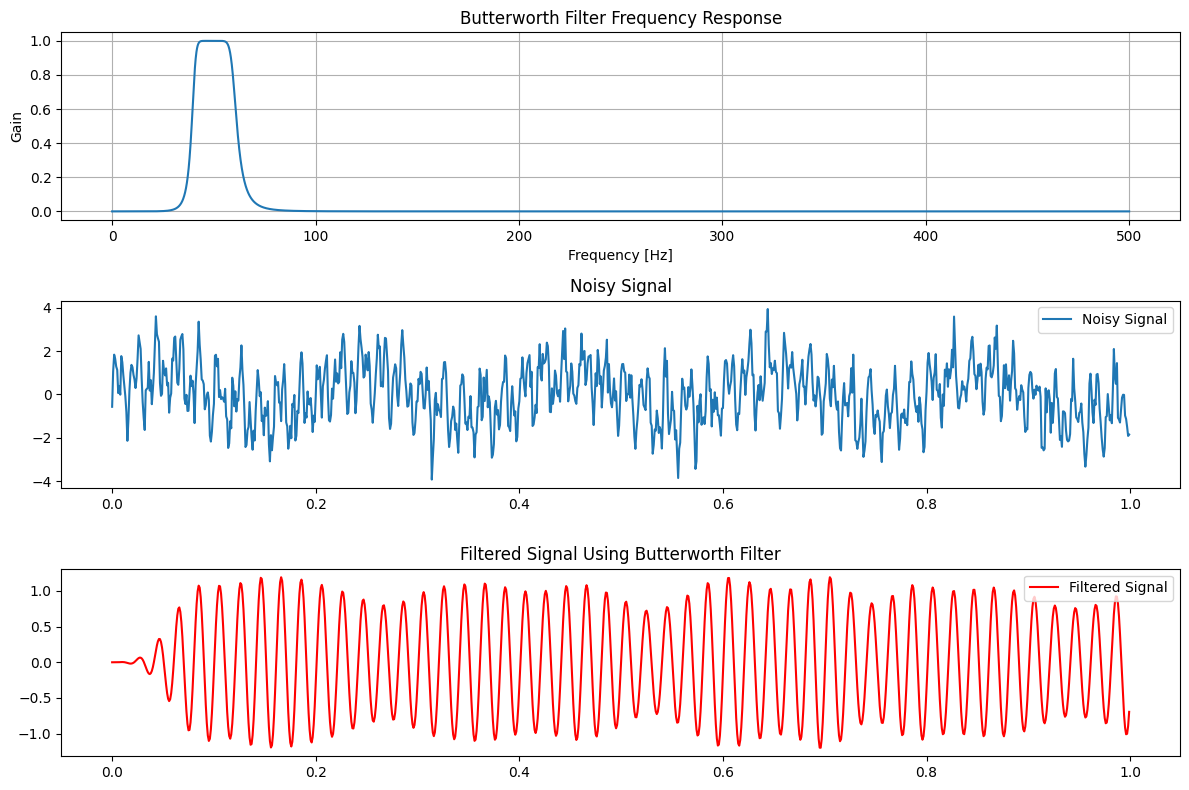

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

# Generate an audio signal with multiple frequencies
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time array
audio_signal = (np.sin(2 * np.pi * 5 * t) +
                np.sin(2 * np.pi * 50 * t) +
                np.sin(2 * np.pi * 120 * t))
noise = np.random.normal(0, 0.5, audio_signal.shape)  # Gaussian noise
noisy_signal = audio_signal + noise  # Noisy signal

# Butterworth filter
lowcut = 40
highcut = 60
order = 5
nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq
b, a = butter(order, [low, high], btype='band')
filtered_signal = lfilter(b, a, noisy_signal)

# Plot the signals
plt.figure(figsize=(12, 8))

# Plot frequency response
w, h = freqz(b, a, worN=8000)
plt.subplot(3, 1, 1)
plt.plot(0.5 * fs * w / np.pi, np.abs(h))
plt.title("Butterworth Filter Frequency Response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Gain")
plt.grid()

# Plot noisy signal
plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, label="Noisy Signal")
plt.title("Noisy Signal")
plt.legend()

# Plot filtered signal
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label="Filtered Signal", color='r')
plt.title("Filtered Signal Using Butterworth Filter")
plt.legend()

plt.tight_layout()
plt.show()


**Task 3:** Detecting Outliers in Health Insurance Claims
---

Number of outliers detected: 14
      age     sex     bmi  children smoker     region      charges  outlier
34     28    male  36.400         1    yes  southwest  51194.55914       -1
175    63  female  37.700         0    yes  southwest  48824.45000       -1
281    54    male  40.565         3    yes  northeast  48549.17835       -1
488    44  female  38.060         0    yes  southeast  48885.13561       -1
530    57    male  42.130         1    yes  southeast  48675.51770       -1
543    54  female  47.410         0    yes  southeast  63770.42801       -1
577    31  female  38.095         1    yes  northeast  58571.07448       -1
819    33  female  35.530         0    yes  northwest  55135.40209       -1
901    60    male  40.920         0    yes  southeast  48673.55880       -1
1062   59    male  41.140         1    yes  southeast  48970.24760       -1
1146   60    male  32.800         0    yes  southwest  52590.82939       -1
1230   52    male  34.485         3    yes  northwest  6

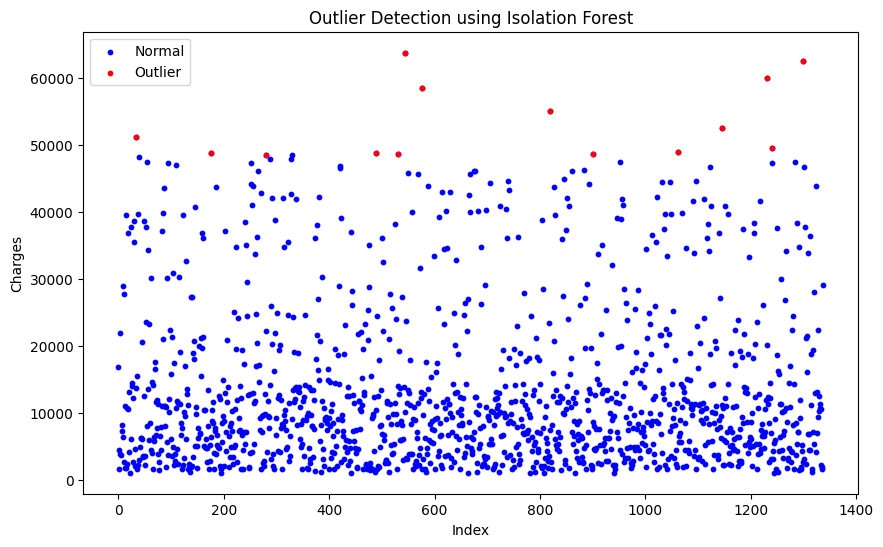

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

data = pd.read_csv("data/insurance.csv")  # Modify the path if downloaded

# Extract the 'charges' column for analysis
charges = data[['charges']]

# Use Isolation Forest to detect outliers
# Assume initially that about 1% of the data might be outliers, hence contamination=0.01
iso_forest = IsolationForest(contamination=0.01)
outliers = iso_forest.fit_predict(charges)

# Results
data['outlier'] = outliers
outlier_data = data[data['outlier'] == -1]

print("Number of outliers detected:", len(outlier_data))
print(outlier_data)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['charges'], color='blue', s=10, label='Normal')
plt.scatter(outlier_data.index, outlier_data['charges'], color='red', s=10, label='Outlier')
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.legend()
plt.show()
